In [1]:
# Load packages
import pandas as pd
import numpy as np
import math

In [2]:
# Read the data
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,
                 names=['sepal length','sepal width','petal length','petal width','class'])


df = df.iloc[:,:-1]
data = df.as_matrix()
name = df.columns.values

df.head(10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# Cole's Solution. 

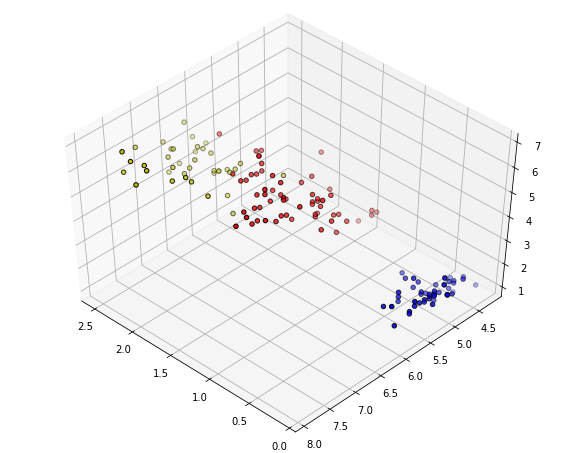

In [3]:
import random
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

# calculates the SSE for a set of clusters
def sse(data, cluster, center):
    sum = 0
    for i in range(0, len(cluster)):
        for ind in cluster[i]:
            dist = (norm(ind - center[i]))**2
            sum += dist
    return sum

# creates a dictionary representing all of the clusters, based on the data and centroids
def createClusters(data, centers, k):
    clusters = {}
    # assigns all data points to a cluster
    for j in range(0, len(data)):
        bestDist = float('inf')
        bestCenNum = None
        for i in range(0,k):
            dist = (norm(data[j] - centers[i]))**2
            if(dist < bestDist):
                bestDist = dist
                bestCenNum = i
        try:
            clusters[bestCenNum].append(j)
        except KeyError:
            clusters[bestCenNum] = []
            clusters[bestCenNum].append(j)
    return clusters

# updates the centroids by calculating the mean of each cluster
def updateCentroids(centers, clusters):
    updated = []
    for i in range(0, len(centers)):
        newCntr = np.mean(data[clusters[i]], axis=0)
        updated.append(newCntr)
    return updated

def kmeans(data, k):
    # creates inital new and old clusters to compare  
    oldCenters = random.sample(data, k)
    oldClusters = createClusters(data, oldCenters, k)
    
    newCenters = updateCentroids(oldCenters, oldClusters)
    newClusters = createClusters(data, newCenters, k)
    
    # continues updating clusters until the centroids no longer change
    while (np.array_equal(newCenters, oldCenters) == False):
        oldCenters = newCenters
        oldClusters = newClusters
        
        newCenters = updateCentroids(newCenters, newClusters)
        newClusters = createClusters(data, newCenters, k)
    
    return newClusters, sse(data, newClusters, newCenters)



# Clustering
k=3 # number of clusters
# Run kmeans 10 times. Choose the best one with lowest SSE.
bestSSE = float('inf')
bestCluster = None
for i in range(10):
    currClust, currSSE = kmeans(data, k)
    if(currSSE < bestSSE):
        bestSSE = currSSE
        bestCluster = currClust
        

# Draw only three attributes of the result.
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
c=['r','b','y']
for i in range(k):
    X = data[bestCluster[i]]
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=c[i], edgecolor='k')
plt.show()

# My Solution

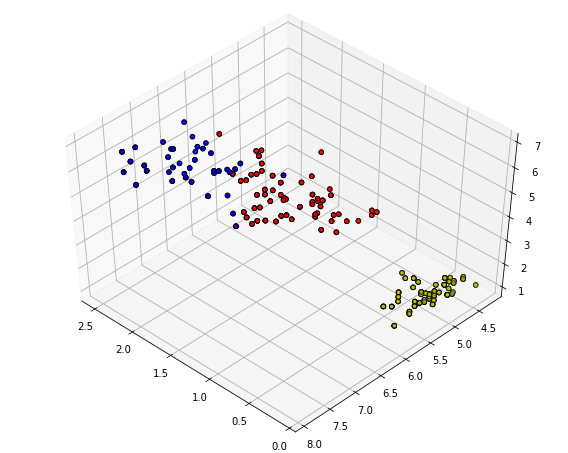

In [4]:
import random
from numpy.linalg import norm

import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
    
def sse(cluster, center):
    result = 0
    for i in range(len(cluster)):
        for j in cluster[i]:
            result += norm(data[j]-center[i])
    return result
    
def kmeans(data, k):
    m,n = np.shape(data)
 
    #Randomlly choose k initial points.
    cluster = {}
    for i in range(k):
        cluster[i] = []   
    centerindex = [random.randint(0,m-1) for i in range(k)]
    center = data[centerindex]

    while True:
        for i in range(m):
            dist = [norm(data[i] - center[j]) for j in range(k)]
            index = dist.index(min(dist))
            cluster[index].append(i)
        
        flag=True
        for j in range(k):
            if len(cluster[j]) == 0:
                flag=False
                center[j] = data[random.randint(0,m-1)]
        
        if flag:
            oldcenter = center
            center = [sum(data[cluster[j]])/len(data[cluster[j]]) for j in range(k)]

            p = sum([norm(center[j]-oldcenter[j]) for j in range(k)])        
            if p<0.01:
                break
        
    value = sse(cluster, center)        
    return cluster, value

k=3
ssevalue = np.inf
cluster = {}
for i in range(10):
    clustertmp, value = kmeans(data,k)
    #print value
    if ssevalue > value:
        cluster = clustertmp.copy()
        ssevalue = value

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
c=['r','b','y']
for i in range(k):
    X = data[cluster[i]]
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=c[i], edgecolor='k')

plt.show()